In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.linear_model as lm 
import statsmodels.formula.api as smf  
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score,train_test_split

In [213]:
plc = pd.read_csv("C:/Users/Jay Ajmera/Downloads/Telco.csv",encoding = 'unicode_escape')
df = plc.copy()
df = df.drop(["customerID"],axis = 1)
plc = df
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [132]:
plc.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [133]:
plc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [214]:
#Mapping
def mapp(plc):
    plc["gender"] = plc["gender"].map({'Female':0, 'Male':1})
    plc["Partner"] = plc["Partner"].map({'No':0, 'Yes':1})
    plc["Dependents"] = plc["Dependents"].map({'No':0, 'Yes':1})
    plc["PhoneService"] = plc["PhoneService"].map({'No':0, 'Yes':1})
    plc["OnlineSecurity"] = plc["OnlineSecurity"].map({'No':0, 'Yes':1,'No internet service':2})
    plc["OnlineBackup"] = plc["OnlineBackup"].map({'No':0, 'Yes':1,'No internet service':2})
    plc["DeviceProtection"] = plc["DeviceProtection"].map({'No':0, 'Yes':1,'No internet service':2})
    plc["TechSupport"] = plc["TechSupport"].map({'No':0, 'Yes':1,'No internet service':2})
    plc["StreamingTV"] = plc["StreamingTV"].map({'No':0, 'Yes':1,'No internet service':2})
    plc["StreamingMovies"] = plc["StreamingMovies"].map({'No':0, 'Yes':1,'No internet service':2})
    plc["PaperlessBilling"] = plc["PaperlessBilling"].map({'No':0, 'Yes':1})
    plc["InternetService"] = plc["InternetService"].map({'DSL':0, 'Fiber optic':1, 'No':2})
    plc["MultipleLines"] = plc["MultipleLines"].map({'No':0, 'Yes':1,'No phone service':2})
    plc["Contract"] = plc["Contract"].map({'Month-to-month':0, 'One year':1, 'Two year':2})
    plc["PaymentMethod"] = plc["PaymentMethod"].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})
    plc["Churn"] = plc["Churn"].map({'No':0, 'Yes':1})
    return plc
plc = mapp(plc)

In [215]:
plc

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,0,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.60,1


In [137]:
plc1 = plc.drop("Churn",axis = 1)
plc1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,1,84.80,1990.50
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.90
7040,0,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,0,29.60,346.45
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.60


In [139]:
x=add_constant(plc1)

vif_df=pd.DataFrame()
vif_df["feature"]=x.columns
vif_df["VIF"]=[variance_inflation_factor(x.values,i)
                 for i in range(len(x.columns))]
print(vif_df)

             feature        VIF
0              const  50.315570
1             gender   1.001631
2      SeniorCitizen   1.150505
3            Partner   1.460622
4         Dependents   1.383011
5             tenure   7.205995
6       PhoneService   3.264368
7      MultipleLines   2.636140
8    InternetService   3.416417
9     OnlineSecurity   4.033614
10      OnlineBackup   3.511517
11  DeviceProtection   3.832340
12       TechSupport   4.270965
13       StreamingTV   3.912904
14   StreamingMovies   3.898403
15          Contract   2.490486
16  PaperlessBilling   1.202875
17     PaymentMethod   1.218255
18    MonthlyCharges   7.332792
19      TotalCharges  10.548779


In [140]:
plc1.drop("TotalCharges",axis = 1,inplace = True)
plc1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,1,84.80
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20
7040,0,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,0,29.60
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40


In [141]:
x=add_constant(plc1)

vif_df=pd.DataFrame()
vif_df["feature"]=x.columns
vif_df["VIF"]=[variance_inflation_factor(x.values,i)
                 for i in range(len(x.columns))]
print(vif_df)

             feature        VIF
0              const  36.396819
1             gender   1.001348
2      SeniorCitizen   1.150349
3            Partner   1.460522
4         Dependents   1.382557
5             tenure   2.687494
6       PhoneService   3.252240
7      MultipleLines   2.635991
8    InternetService   3.316982
9     OnlineSecurity   3.992253
10      OnlineBackup   3.446713
11  DeviceProtection   3.802873
12       TechSupport   4.237547
13       StreamingTV   3.912513
14   StreamingMovies   3.898387
15          Contract   2.476919
16  PaperlessBilling   1.202633
17     PaymentMethod   1.217518
18    MonthlyCharges   3.488642


In [142]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85,No
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,No
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,Yes
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,No
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,1,84.80,1990.50,No
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,No
7040,0,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,0,29.60,346.45,No
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.60,Yes


In [144]:
plc2 = plc1
Fact_v = ""
for i in plc2.columns:
    Fact_v = Fact_v + " + " + i
Fact_v
plc2["Churn"] = df["Churn"]
plc2["Churn"] = plc2["Churn"].map({'No':0, 'Yes':1})

In [201]:
reg0 = smf.logit("Churn~  SeniorCitizen - Partner + Dependents + tenure - PhoneService + MultipleLines + InternetService + OnlineSecurity + OnlineBackup - DeviceProtection + TechSupport - StreamingTV + StreamingMovies + Contract + PaperlessBilling + PaymentMethod + MonthlyCharges",data = plc2).fit()
reg0.summary()
#dropped gender, Partner,PhoneService, DeviceProtection, Streaming TV from Model

Optimization terminated successfully.
         Current function value: 0.416256
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7029
Method:                           MLE   Df Model:                           13
Date:                Sun, 09 Apr 2023   Pseudo R-squ.:                  0.2806
Time:                        18:29:55   Log-Likelihood:                -2931.7
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.9999      0.142     -7.018      0.000      -1.279      -0.721
SeniorCitizen        0.2221      0.084      2.637      0.008       0.057       0.387
Dependents          -0.1675      0.081     -2.065      0.039      -0.327      -0.009
tenure              -0.0339      0.002    -14.825      0.000      -0.038      -0.029
MultipleLines        0.3298      0.055      6.001      0.000       0.222       0.438
InternetService      0.5576      0.080      6.981      0.000       0.401       0.714
OnlineSecurity      -0.4467      0.079     -5.675      0.000      -0.601      -0.292
OnlineBackup        -0.1831      0.072     -2.539      0.011      -0.324      -0.042
TechSupport         -0.4088      0.079     -5.162      0.000      -0.564      -0.254
StreamingMovies      0.1946      0.071      2.734      0.006       0.055       0.334
Contract            -0.6742      0.076     -8.887      0.000      -0.823      -0.525
PaperlessBilling     0.3576      0.074      4.844      0.000       0.213       0.502
PaymentMethod       -0.1425      0.030     -4.728      0.000      -0.202      -0.083
MonthlyCharges       0.0127      0.002      6.706      0.000       0.009       0.016
====================================================================================
"""

In [206]:
pred = reg0.predict().round()
pred

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Length: 7043, dtype: float64

In [154]:
conf_matrix = metrics.confusion_matrix(plc2.Churn,pred)
conf_matrix

array([[4655,  519],
       [ 854, 1015]], dtype=int64)

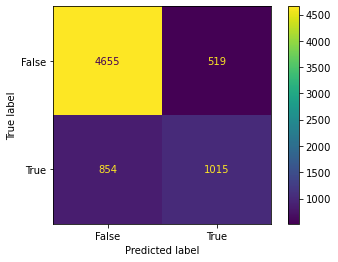

In [159]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [165]:
X = plc.drop("Churn",axis = 1)
Y = plc2.Churn
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,1,0,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15
3,1,0,0,0,45,0,2,0,1,0,1,1,0,0,1,0,2,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,1,84.80,1990.50
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,3,103.20,7362.90
7040,0,0,1,1,11,0,2,0,1,0,0,0,0,0,0,1,0,29.60,346.45
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,1,74.40,306.60


In [166]:
model = lm.LogisticRegression()
model.fit(X,Y)
model.coef_

C:\Users\Jay Ajmera\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-5.64519549e-02,  2.67991042e-01, -2.17417361e-02,
        -2.09112782e-01, -5.46740882e-02, -1.95138393e-01,
         2.57863948e-01,  4.69320017e-01, -4.49729197e-01,
        -1.82848875e-01, -8.69793059e-02, -4.44218542e-01,
         1.31442837e-01,  1.40367206e-01, -7.25883002e-01,
         3.49251484e-01, -1.34244207e-01,  4.83587178e-03,
         2.88123922e-04]])

In [171]:
#Testing using Kflold
kflod = KFold(n_splits = 100)
test = cross_val_score(model,X,Y,cv=kflod,scoring = 'accuracy',n_jobs = -1 )
np.mean(test)

0.803897384305835

In [186]:
reg1 = smf.logit("Churn~  SeniorCitizen - Partner - Dependents + tenure - PhoneService + MultipleLines*InternetService + OnlineSecurity + OnlineBackup - DeviceProtection + TechSupport - StreamingTV + StreamingMovies + Contract + PaperlessBilling + PaymentMethod + MonthlyCharges",data = plc2).fit()
reg1.summary()

Optimization terminated successfully.
         Current function value: 0.420211
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                          Logit   Df Residuals:                     7031
Method:                           MLE   Df Model:                           11
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.2737
Time:                        20:59:42   Log-Likelihood:                -2959.5
converged:                       True   LL-Null:                       -4075.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.1382      0.139     -8.170      0.000      -1.411      -0.865
SeniorCitizen        0.3096      0.082      3.776      0.000       0.149       0.470
tenure              -0.0361      0.002    -15.980      0.000      -0.041      -0.032
MultipleLines        0.2626      0.053      4.935      0.000       0.158       0.367
OnlineSecurity      -0.3290      0.075     -4.377      0.000      -0.476      -0.182
OnlineBackup        -0.0479      0.069     -0.699      0.485      -0.182       0.086
TechSupport         -0.3148      0.077     -4.111      0.000      -0.465      -0.165
StreamingMovies      0.3287      0.068      4.843      0.000       0.196       0.462
Contract            -0.7772      0.075    -10.392      0.000      -0.924      -0.631
PaperlessBilling     0.3769      0.073      5.152      0.000       0.234       0.520
PaymentMethod       -0.1557      0.030     -5.211      0.000      -0.214      -0.097
MonthlyCharges       0.0182      0.002     10.535      0.000       0.015       0.022
====================================================================================
"""

In [185]:
pred1 = reg1.predict().round()
conf_matrix = metrics.confusion_matrix(plc2.Churn,pred1)
conf_matrix
acc = (conf_matrix[0,0] + conf_matrix[1,1])/np.sum(conf_matrix)
acc

0.8073264233991196

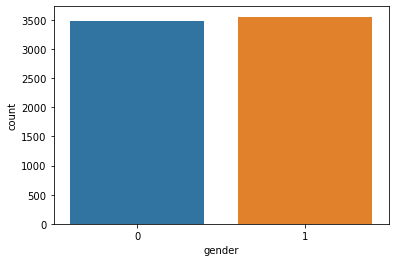

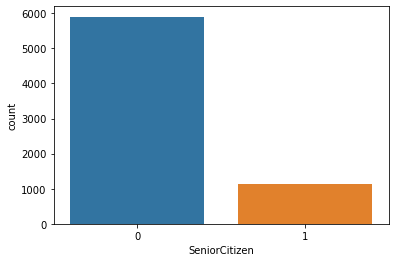

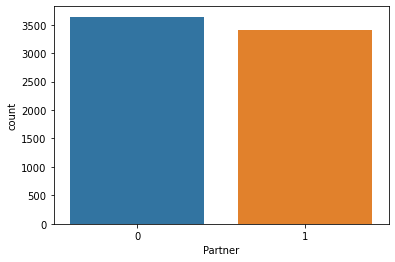

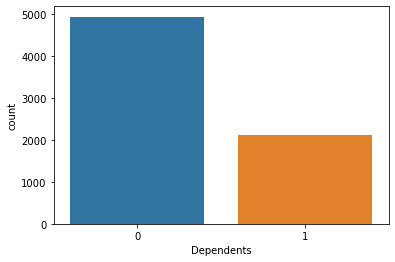

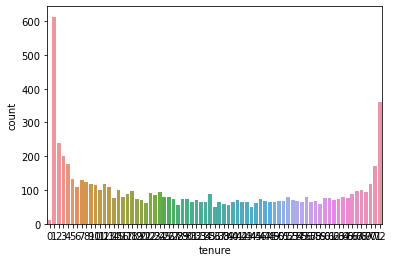

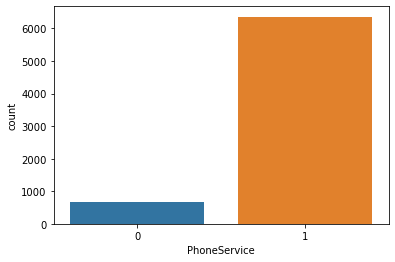

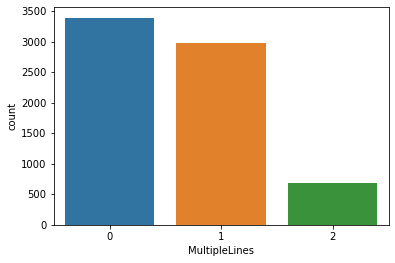

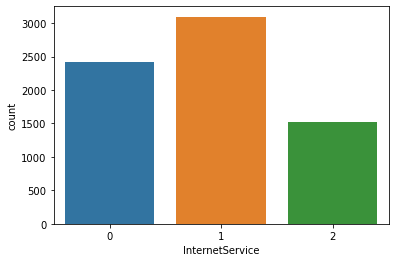

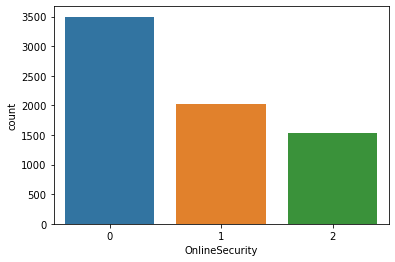

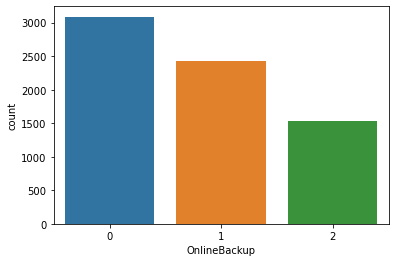

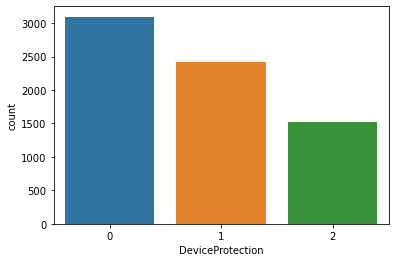

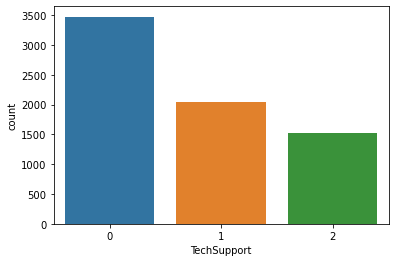

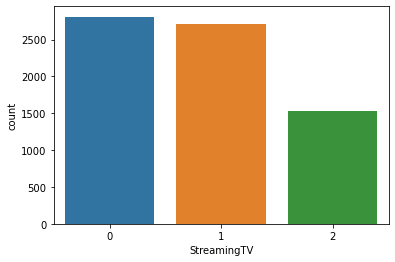

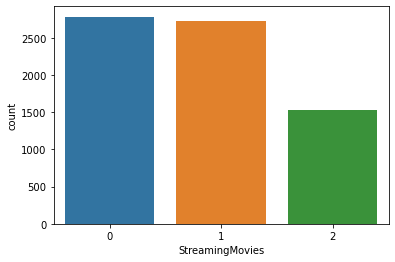

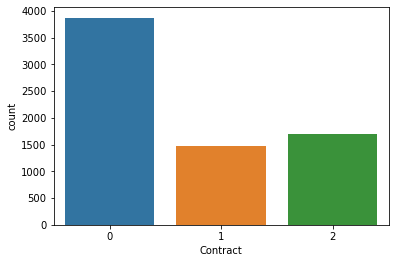

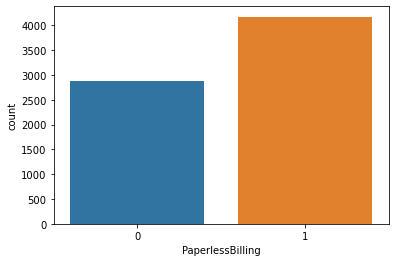

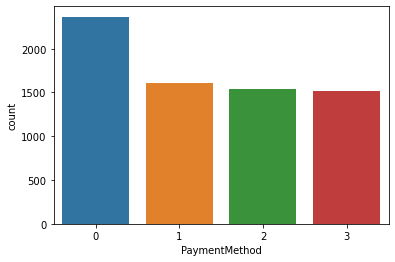

In [190]:
for i, predictor in enumerate(plc2.drop(columns=['Churn', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=plc2, x=predictor)

Text(0.5, 1.0, 'Monthly charges by churn')

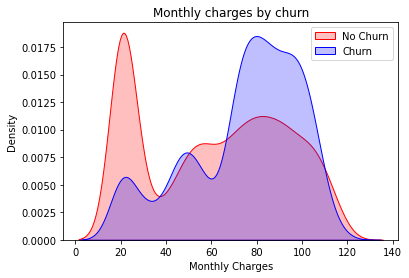

In [191]:
Mth = sns.kdeplot(plc2.MonthlyCharges[(plc2["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(plc2.MonthlyCharges[(plc2["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')
#when the churn is high then the charges are high.

In [196]:
conf_matrix = metrics.confusion_matrix(plc2.Churn,pred)
conf_matrix

array([[4655,  519],
       [ 854, 1015]], dtype=int64)

In [204]:
#Accuracy
acc = (conf_matrix[0,0]+conf_matrix[1,1])/np.sum(conf_matrix)
acc

0.8050546642055942

In [200]:
#Precision = True Positive/True Positive + False Positive  
Precision = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
#Recall = True Positive/True Positive + False Negative  
Recall = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print(Precision)
print(Recall)

0.8449809402795425
0.8996907614998068


In [228]:
#BOLA
data = pd.read_csv("C:/Users/Jay Ajmera/Desktop/SEM4/SSDI/test_proj.csv")
data = mapp(data)
pred = reg0.predict(data).round()
pred

0    1.0
1    0.0
dtype: float64

In [1]:
df[["a","b","c","d"]] =df[["a","b","c","d"]].astype(str)

NameError: name 'df' is not defined

In [2]:
df.drop("gender",axis = 0)

NameError: name 'df' is not defined